In [66]:
%%html

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>



In [67]:
import warnings
warnings.filterwarnings("ignore")

### Welcome to Graphing and Analyzing Rational Functions tutorial! 

In the Show Code mode, please uncomment the lines in the cell below and run the whole cell to make sure all of the necessary Jupyter notebook extensions are installed. Feel free to skip this step if you have installed them manually from the Jupyter Nbextensions configurator.

In [68]:
#!pip3 install jupyter_nbextensions_configurator &> /dev/null
#!jupyter nbextensions_configurator enable --user &> /dev/null

#!conda install -c conda-forge jupyter_contrib_nbextensions &> /dev/null
#!jupyter contrib nbextension install --user
#!jupyter nbextension enable python-markdown/main

In [69]:
#Modules that will be used throughout this notebook are imported in this cell.

import sympy as sym
from sympy import diff
from sympy.interactive import printing
from sympy import ask
from sympy import Q as check

import numpy as np
import matplotlib
import matplotlib.ticker as ticker

from plotting_routines import *
from operations import *

from functools import partial, update_wrapper

import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import Layout, Output
import notebook.nbextensions

import itertools

printing.init_printing(use_latex=True)

## Introduction

Rational functions of a single variable $x$ are simply fractions of polynomials in $x$, i.e. any $R(x)$ such that:

$R(x) = \frac{P_m(x)}{Q_n(x)}$,

where $P_m$ and $Q_n$ are polynomials, is a rational function. In the above expression, $m,n \in \mathbb{N} \cup \{0\}$, defining the degrees of $P_m$ and $Q_n$ respectively.

## Example

In [70]:
"""In this notebook, we will be analyzing the function R_func, which is defined below. Its arguments are x and a,
    with x being R_func's single variable and a being a parameter."""

"""x and a are created as symbols objects with the help of the imported sympy module:"""
x = sym.symbols('x')

"""We can optionally require a (a certain real number whose value we don't immediately unveil) to be strictly 
    positive/strictly negative/nonpositive/nonnegative or decide to not have any constraints on it except for being 
    real."""

a = sym.symbols('a',real=True,positive = True)

def R_func(x,a):
    """Numerator and denominator variables can be modified to accommodate analysis of a custom function. 
    Feel free to change the expressions below!"""
    numerator = a*x**2 + x - 10
    denominator = x**4 - a**4
    
    """Note that we will return not only the rational function expression but also its constituents for
    convenience – this is something we will need to use in the future R_func calls."""
    return (numerator/denominator,numerator,denominator)

Let us begin with a simple example of a rational function $R(x)$, {{R_func(x,a)[0]}} We will prepare for graphing it by performing a step-by-step analysis of its behaviour and then explore how the latter depends on the value of the parameter $a$. We require the following condition for $a$:



In [71]:
"""The checks below enable us to report the constraint on a that we set in the above cell and to define its minimum
and maximum values that will be considered in future analysis. We also define a_random here, which is later used to
create an R_func instance at a fixed value of a. We set a_random to be equal to either -1,0, or 1, depending on
the sign constraint on a."""

if sym.ask(check.positive(a)):
    print('a is strictly positive')
    amin = 1
    amax = 10
    a_random = 1
elif sym.ask(check.negative(a)):
    print('a is strictly negative')
    a_random= -1
    amin = -10
    amax = -1
elif sym.ask(check.nonpositive(a)):
    print ('a is nonpositive')
    a_random = -1
    amin = -10
    amax = 0
elif sym.ask(check.nonnegative(a)):
    print ('a is nonnegative')
    a_random = 1
    
    amin = 0
    amax = 10
else:
    a_random = np.random.randint(-1,2)

a is strictly positive


### Step 1. Factorization

* Whenever possible, we should try to factor $P$, the polynomial in the numerator, which in our case is {{R_func(x,a)[1]}} to see if there are any values of $x$ that yield $P(x) = 0$, where the overall function $R(x)$ will also turn into 0.


* Similarly, it is useful to try and factor $Q$: {{R_func(x,a)[2]}}
 to see if there are any $x$ such that $Q(x) = 0$, where $R(x)$ will not be defined.



In [72]:
"""Here, we extract the expressions for the function being examined, as well as its numerator and denominator,
using the method R_func that we have defined above."""
R = R_func(x,a)[0]
P = R_func(x,a)[1]
Q = R_func(x,a)[2]

For the numerator, we get:

In [73]:
"""Function factorize is a part of the supplied operations.py module. Its purpose is to find the real roots of the
considered expression – in this case, the numerator P – and to represent that expression as a product of factors 
of the form (x-each_real_root)*(remaining unfactorized expression)."""

factorize(P,x)

And for the denominator:

In [74]:
factorize(Q,x)

### Step 2. Finding the function domain

* Let us look at the result of the denominator factorization. Does it look different from the initial form of $Q$?

In [75]:
"""This cell creates a dropdown widget whose purpose is to ask a question and check the answer. Here, we present
a very simple example of checking with the student whether we were able to factorize the function denominator –
that is, whether any real roots were found. """ 

factorization_dpd = ipywidgets.Dropdown(options=[' ','Yes', 'No'],
    value=' ',
    description='Answer:',
    disabled=False,)

display(factorization_dpd)

value_change_instance_fact = partial(on_value_change,problem_type = 'factorization', widget = factorization_dpd,
                             function_setup = R_func, a_value = a_random)

factorization_dpd.observe(value_change_instance_fact, names='value')

Dropdown(description='Answer:', options=(' ', 'Yes', 'No'), value=' ')

* Positive answer would mean that the denominator has real roots, which would affect the function domain. In particular, if you see expressions of the type $(x-q_i)$ in the factorized denominator, our function will not be defined at each such $q_i$. This happens because $Q \equiv (x-q_1) \cdot (x-q_2) \cdot (x-q_3)... = 0$ at either of $q_1, q_2, q_3, ...$, and division by 0 is effectively "prohibited".


* Unless $Q$ simply contains $x$ raised to a certain power (in which case 0 is one of the denominator roots), negative answer means that we found no real roots of the denominator. Therefore, no constraints on the domain of $R(x)$ exist, and the function is everywhere (on $\mathbb{R}$) defined.


Note that if we did manage to find some real roots in $Q$, the following situations are possible:

* some or all of the $Q$ roots match with those of $P$ (e.g. $q_j = p_j$), in which case factors $(x - p_j)$ and $(x - q_j)$ in the numerator and the denominator respectively cancel out. In this case, $R(x)$ is only not defined at $x = q_j = p_j$. If the 'problematic' factors canceled completely in the denominator,  the discontinuity is called removable – there is nothing in the denominator that we are not allowed to divide by. 

       
* If the denominator still contains some $(x - q_j)$-like factors after all the cancellations (or if $P$ and $Q$ did not share any roots in the first place), $\lim_{x\to {q_j}} R(x) = \pm \infty$, and we have an infinite discontinuity (vertical asymptote) at such $q_j$. 


Which of the two situations do we have? For simplicity, assume $a = 1$ if we required $a \geq 0$, $a = -1$ if we put $a \leq 0$, and any integer value between -1 and 1, inclusive, if $a \in \mathbb{R}$ (this information is contained in the variable **a_random** that we defined earlier). 

In [76]:
"""In this cell, we create the same kind of a dropdown widget as before and simply ask a different question – 
now about discontinuity types at denominator roots. """

option_a = 'No cancellation occurs; therefore, we have vertical asymptotes at all of the denominator roots.'
option_b = 'Some factors got cancelled, and the corresponding discontinuities are removable!'
    
discontinuity_dpd = ipywidgets.Dropdown(options=[' ',option_a,option_b],
    value=' ',
    description='Answer:',
    disabled=False, layout=Layout(width = '800px'))

value_change_instance_disc = partial(on_value_change, problem_type = 'general_discontinuity_type', 
                             widget = discontinuity_dpd,
                             function_setup = R_func, a_value = a_random)

display(discontinuity_dpd)
discontinuity_dpd.observe(value_change_instance_disc, names='value')    

Dropdown(description='Answer:', layout=Layout(width='800px'), options=(' ', 'No cancellation occurs; therefore…

Let us now look at each denominator root specifically and determine the corresponding discontinuity type. On the left of each denominator root value, please choose the type of the discontinuity from the dropdown menu and click "Check" to check your answer.

In [77]:
disc_widget_dict = {}
disc_feedback_dict = {}

disc_tuple_to_display = [ipywidgets.Label(value='Discontinuity types at denominator roots', disabled=True)]

style = {'description_width': 'initial'}
align_kw = dict(
    _css = (('.widget-label'),)
)


remov_disc = return_zeros(a_random,R_func)[1]
inf_disc = return_zeros(a_random,R_func)[2]

all_disc = np.sort(np.append(remov_disc, inf_disc))

for i in range (0,len(all_disc)):

    disc_widget_dict[all_disc[i]] = ipywidgets.Dropdown(value=' ', 
                    options = [' ', 'removable discontinuity', 'vertical asymptote'],
                    description = '$' + str(np.round(float(all_disc[i]),2)) + '$',
                    style = style, flex_flow = 'row', layout = Layout(border = 'solid 1px gray'),
                    width = '100px', disabled = False)
    
    disc_feedback_dict[all_disc[i]] = ipywidgets.Label(value='Feedback: ', 
                    flex_flow = 'row', width = '100px', disabled = True)
    
    disc_tuple_to_display = np.append(disc_tuple_to_display, disc_widget_dict[all_disc[i]])
    disc_tuple_to_display = np.append(disc_tuple_to_display, disc_feedback_dict[all_disc[i]])
    
disc_tuple_to_display = tuple(disc_tuple_to_display)

disc_check_button = ipywidgets.Button(description='Check', disabled=False, button_style='',
                    tooltip='Check', icon='question')

disc_try_again_button = ipywidgets.Button(description='Try again', disabled=True, button_style='',
                    tooltip='Try again')

disc_container = ipywidgets.Box(tuple(disc_tuple_to_display), layout=Layout(
    display='flex',
    flex_flow='column',
    align_items='stretch', width = '100%'))

display(disc_container)
display(disc_check_button)
display(disc_try_again_button)

disc_output = ipywidgets.Output()
display(disc_output)

when_we_click_check_button_disc = partial(when_we_click_check_button, function_setup=R_func,
                                          widget_dict = disc_widget_dict, feedback_dict = disc_feedback_dict,
                                          test_values = all_disc,
                                          problem_type = 'specific_discontinuity_type', 
                                          check_button = disc_check_button,
                                          try_again_button = disc_try_again_button,
                                          a_value = a_random, output = disc_output)

when_we_click_try_again_button_disc = partial(when_we_click_try_again_button, widget_dict = disc_widget_dict,
                                              feedback_dict = disc_feedback_dict, test_values = all_disc, 
                                              check_button = disc_check_button, 
                                              try_again_button = disc_try_again_button, 
                                              output = disc_output)   

disc_check_button.on_click(when_we_click_check_button_disc)
disc_try_again_button.on_click(when_we_click_try_again_button_disc)


Box(children=(Label(value='Discontinuity types at denominator roots'), Dropdown(description='$-1.0$', layout=L…

Button(description='Check', icon='question', style=ButtonStyle(), tooltip='Check')

Button(description='Try again', disabled=True, style=ButtonStyle(), tooltip='Try again')

Output()

So far, we get the following information on the behaviour of $R(x)$:

In [78]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


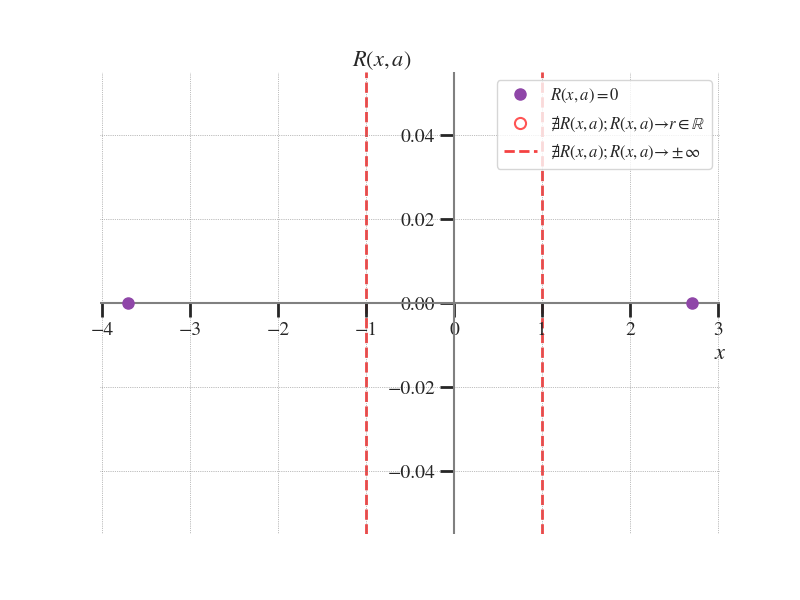

interactive(children=(IntSlider(value=1, description='$a$', max=10, min=1), Output()), _dom_classes=('widget-i…

In [79]:
"""The above cell ensures that the %matplotlib notebook interactive figure be displayed properly. 
If this javascript magic is not included, the figure will be too large and a scroll bar will appear. """

%matplotlib notebook

"""We will aim to show the R(x,a) function zeros, removable discontunuities, and vertical asymptotes, if any,
on this plot. No other properties will be displayed yet. All of the points, including the removable discontinuities,
will be put on x-axis for easier comprehension. This does not mean that the function actually approaches zero at
any of the removable discontinuity points, although it as well might. """

#Setting up the plotting using the custom method from the set_up_plotting.py module (provided with the notebook): 

fig, ax = set_up_plotting(8,6,'Zeros, removable discontinuities, and vertical asymptotes')
ax.set_xlabel('$x$',fontsize=16, x = 1)
ax.set_ylabel('$R(x,a)$',fontsize=16, rotation = "horizontal",y=1)

ax.grid(color='gray', linestyle=':', lw = 0.5)

#Since the method returns no visible axes by default, we plot them explicitly:

ax.axhline(y = 0,color = 'gray', label = '_nolegend_', zorder = 1)
ax.axvline(x = 0, color = 'gray', label = '_nolegend_', zorder = 2)


"""For each value of the parameter a, we will have to replot our sketch with the x-values of zeros and
discontinuties corresponding to this value of a. To enable such a routine, we define the update_zeros_plot method:"""

def update_zeros_plot(a):
    
    """As the notebook is still in development, we wrap the plot update routine into a try-except statement 
    to prevent user from seeing the lengthy output in case an error occurs. This structure can be removed
    if a detailed error description is preferred. """
    
    try:
        #Find the total number of lines (e.g. vertical asymptotes and axes) currently present on the plot:
        i = len(ax.lines)
        
        #Delete all of these lines (but leave the 2 axes!) before updating the plot:
        while i != 2:
            del ax.lines[len(ax.lines)-1]
            i = i-1

        #Using the return_zeros method from the supplied operations.py module, find function zeros and discontinuities
        #for the chosen value of a:
        func_zeros, func_remov_disc, func_inf_disc = return_zeros(a,R_func)

        #Plot each of the above x-value sets and style accordingly! 
        ax.plot(func_zeros,np.zeros(len(func_zeros)),ls='none',marker='o',
               markersize = 8, color = '#8f46a8', label = r'$R(x,a) = 0$')

        ax.plot(func_remov_disc,np.zeros(len(func_remov_disc)),ls='none',marker='o', markeredgewidth = 1.5,
                markersize = 8, markeredgecolor = '#ff5454', color = 'white',
                label = r'$\nexists R(x,a); R(x,a) \to r \in \mathbb{R}$')

        for every_inf_disc in func_inf_disc:
            ax.axvline(x=every_inf_disc,ls='--', lw = 2,
                       markersize = 8, color = '#f44242', label = r'$\nexists R(x,a); R(x,a) \to \pm \infty$', 
                       zorder = 0)
            
        #Use by_label method to avoid repetition of labels in the legend:
        handles, labels = ax.get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(),loc='upper right', frameon = True, fontsize = 12)
        
    #Suppress the lengthy output in case of an unexpected error:
    except:
        print(':(')
    
#Create a slider to enable the user to change the value of the parameter a, starting from a_random and 
#remaining within the boundaries of amin and amax (defined earlier):

a_slider = ipywidgets.IntSlider(min=amin,max=amax,step=1,value=a_random,description = '$a$')

#Finally, display the interactive plot:

"""Note: if only "A Jupyter Widger"-type message is displayed instead of the full interactive widget, please try 
restarting the kernel with Kernel -> Restart & Clear Output, and then click on Cell -> Run All. If the plot is still 
not visible, please run this cell separately. If none of these work, please go to the beginning of this notebook 
and try installing the relevant modules by uncommenting the bash command lines."""

interactive_plot = interactive(update_zeros_plot, a = a_slider)
output = interactive_plot.children[-1]
interactive_plot



### Step 3. Constant sign intervals

Let us know explore at which intervals in $x$ our function takes negative sign and where it goes positive.

To get an intuitive feeling of how the function behaves in terms of its sign, we (temporarily!) consider $R(x,a=a_{\mathrm{random}})$ (for $a_{\mathrm{random}} \in \{-1, 0, 1\}$ ($+1$ if we required $a \geq 0$, $-1$ if we required $a \leq 0$, and any integer value between $-1$ and $1$ if $a \in \mathbb{R}$). 

Keeping in mind the removable discontinuities, we simplify the function {{R_func(x,a_random)[0]}} by cancelling the common factors in the numerator and the denominator and get:

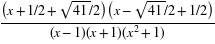

In [80]:
simplified_num = factorize(sym.fraction(simplified_function(R_func,a_random)[0],x)[0],x)
simplified_denom = factorize(sym.fraction(simplified_function(R_func,a_random)[0],x)[1],x)
simplified_num/simplified_denom

We look once again at the zeros of this function, both those of numerator and those of denominator, but now also pay attention to their _multiplicity_ $-$ that is, which power $k_i$ corresponds to the root $r_i$. In other words, we should see each of the numerator/denominator roots, if any, appear in the form $(x - r_i)^{k_i}$, and our goal is to find each such $k_i$. Let us write the latter values down near their respective roots:

In [81]:
roots_widget_dict = {}
feedback_roots_dict = {}

all_roots = []
roots_tuple_to_display = [ipywidgets.Label(value='Numerator & denominator root multiplicities', disabled=True)]

style = {'description_width': 'initial'}
align_kw = dict(
    _css = (('.widget-label'),)
)


num_roots =  list(find_multiplicities('num',a_random,R_func,P,Q)[0]['num'].keys())
denom_roots = list(find_multiplicities('denom',a_random,R_func,P,Q)[0]['denom'].keys())

all_roots = np.sort(np.append(num_roots, denom_roots))

for i in range (0,len(all_roots)):
    
    roots_widget_dict[all_roots[i]] = ipywidgets.Text(value=' ', disabled=False, 
                    description = '$' + str(np.round(float(all_roots[i]),2)) + '$',
                    style = style, flex_flow = 'row', layout = Layout(border = 'solid 1px gray'),
                                               width = '100px')
    
    feedback_roots_dict[all_roots[i]] = ipywidgets.Label(value='Feedback: ', 
                    description = 'Feedback: ', flex_flow = 'row',
                   width = '100px', disabled = True)
    
        
    roots_tuple_to_display = np.append(roots_tuple_to_display, roots_widget_dict[all_roots[i]])
    roots_tuple_to_display = np.append(roots_tuple_to_display, feedback_roots_dict[all_roots[i]])
    
roots_tuple_to_display = tuple(roots_tuple_to_display)

    

root_check_button = ipywidgets.Button(description='Check', disabled=False, button_style='',
                tooltip='Check', icon='question')
root_try_again_button = ipywidgets.Button(description='Try again', disabled=True, button_style='',
                tooltip='Try again')

roots_container = ipywidgets.Box(roots_tuple_to_display, layout=Layout(
    display='flex',
    flex_flow='column',
    align_items='stretch', width = '100%'))


display(roots_container)
display(root_check_button)
display(root_try_again_button)

roots_output = ipywidgets.Output()
display(roots_output)
    
when_we_click_check_button_roots = partial(when_we_click_check_button, function_setup=R_func,
                                          widget_dict = roots_widget_dict, test_values = all_roots,
                                          problem_type = 'multiplicity', check_button = root_check_button,
                                          try_again_button = root_try_again_button,
                                          feedback_dict = feedback_roots_dict, a_value = a_random,
                                          output = roots_output)

when_we_click_try_again_button_roots = partial(when_we_click_try_again_button, widget_dict = roots_widget_dict,
                                              test_values = all_roots, check_button = root_check_button,
                                              try_again_button = root_try_again_button,
                                              feedback_dict = feedback_roots_dict, output = roots_output)   

root_check_button.on_click(when_we_click_check_button_roots)
root_try_again_button.on_click(when_we_click_try_again_button_roots)

Box(children=(Label(value='Numerator & denominator root multiplicities'), Text(value=' ', description='$-3.7$'…

Button(description='Check', icon='question', style=ButtonStyle(), tooltip='Check')

Button(description='Try again', disabled=True, style=ButtonStyle(), tooltip='Try again')

Output()

Now that we know these multiplicities, we can play a game called _Snake_. The rules are as follows:
* the snake runs from $-\infty$ on $x$-axis, where it continuously takes the sign of our simplified function evaluated at a large negative value of $x$...
* ... just until it hits the first numerator/denominator root of the simplified function. When it does, it either turns and changes the sign if the multiplicity of that root is odd, or continues its lazy motion in the same half-plane if the multiplicity of that root is even.
* The above is repeated once the subsequent roots appear on the snake's path: 

  Odd root multiplicity = rotate and change the sign;
  
  Even root multiplicity = stay on the same side.
  
In practice, this means the following:

<IPython.core.display.Javascript object>


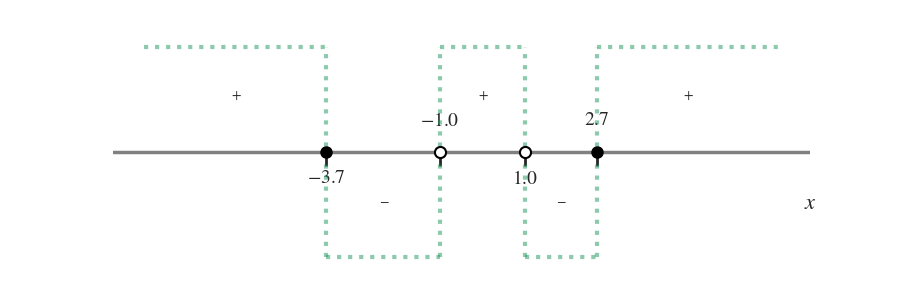

interactive(children=(IntSlider(value=1, description='$a$', max=20, min=1), Output()), _dom_classes=('widget-i…

In [82]:
func_snake_fig, func_snake_ax = set_up_plotting(9,3,'Constant sign intervals')
func_snake_ax.axes.get_yaxis().set_visible(False)
func_snake_ax.spines['left'].set_position('zero')
func_snake_ax.spines['bottom'].set_position('zero') 
func_snake_ax.axhline(y = 0, color = 'gray', label = '_nolegend_', lw = 2.5)
func_snake_ax.set_xlabel('$x$', fontsize = 16, x = 1)

            
a_slider = ipywidgets.IntSlider(min=1,max=20,step=1,value=1, description = '$a$')

interactive_plot = interactive(build_snake, function_setup = fixed(R_func), a_value = a_slider,
                              snake_ax = fixed(func_snake_ax), arr_flag = fixed(0))
output = interactive_plot.children[-1]
interactive_plot

The above schematic very roughly and yet accurately tells us where our chosen function changes sign. At $x$ marked with filled black circles, it does so continuously (such circles correspond to the function zeros we have found earlier). At $x$ marked with unfilled circles, the function is discontinuous and the sign changes without crossing the $x$-axis. 

If the same approach is applied for this function's derivative in Step 5, we will also be able to find the intervals where it increases/decreases monotonically.

## Step 4. Local extrema

To better visualize the behaviour of our function in between the zeros and discontinuities, it always helps to find where its local 'peaks' and 'valleys', if any, are located.

According to [Fermat's theorem](http://mathonline.wikidot.com/fermat-s-theorem-for-extrema), such peaks and valleys (called the **function extrema**) will be found at values of $x_{\mathrm{ext}}$ such that the derivative $\frac{\mathrm{d}R(x,a)}{\mathrm{d}x}\Big|_{x_{\mathrm{ext}}} = 0$.

The general approach is to evaluate the derivative of $R(x,a)$ as a function of $x$, after which the above Fermat's equation can be solved for $x_{\mathrm{ext}}$. Let's get right to it!

The derivative of our function $R(x,a)$ is:


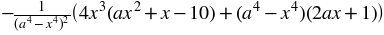

In [83]:
def derivative(x,a):
    func = sym.simplify(diff(P/Q,x))
    return (func, sym.fraction(func)[0], sym.fraction(func)[1])

derivative(x,a)[0]

We use our good old **find_multiplicities** function to find values of $x$ such that the above expression as a whole is zero at those $x$. For example, for $a = $ **a_random** (as chosen above), they are (to the second digit precision):

In [84]:
der_zeros = return_zeros(a_random,derivative)[0]
if len(der_zeros) > 0:
    message = list(np.round(np.real(der_zeros),2))
else:
    message = 'Empty! The derivative of R(x,a) does not have any zeros...'
    
message

If we found any values above, they are the extrema of $R(x,a)$ $-$ otherwise this function has no peaks/valleys on its domain and only keeps increasing or decreasing monotonically with $x$ on the whole domain.

How do we know whether each of these extrema is a local maximum (peak) or a local minimum (valley) of $R(x,a)$? A straightforward way to find this out is to evaluate the second derivative of $R(x,a)$ at $x_{\mathrm{ext}}$ and check its sign. Counterintuitively, if $\frac{\mathrm{d}^2R(x,a)}{\mathrm{d}x^2}\Big|_{x_{\mathrm{ext}}} > 0$, we have a minimum, and vice versa: $\frac{\mathrm{d}^2R(x,a)}{\mathrm{d}x^2}\Big|_{x_{\mathrm{ext}}} < 0$ will give us a maximum.

Sounds simple? 

If you play with the function selection a bit, you will see that in some cases our second derivative turns out to be zero, which means that we cannot conclude whether the extremum point under investigation is a local maximum or a local minimum. In that case we should check higher-order derivatives and find the first one that is not equal to zero. However, this approach is typically quite time-consuming (what if only the seventeenth-order derivative turns out to be non-zero?)... Is there a workaround? 

## Step 5. Intervals of monotonicity

Fortunately, there is! As we already developed the Snake game approach for finding where the function $R(x,a)$ changes its sign, we can now apply it to examine where $R^{\prime} (x,a)$ does so. Check this out:


<IPython.core.display.Javascript object>


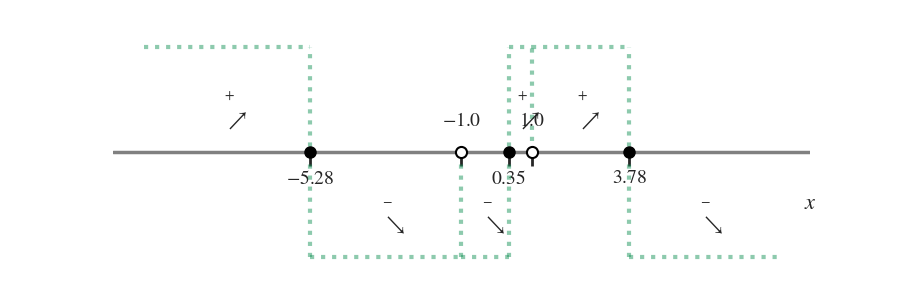

interactive(children=(IntSlider(value=1, description='$a$', max=10, min=1), Output()), _dom_classes=('widget-i…

In [85]:
deriv_snake_fig, deriv_snake_ax = set_up_plotting(9,3,'Intervals of monotonicity')
deriv_snake_ax.axes.get_yaxis().set_visible(False)
deriv_snake_ax.spines['left'].set_position('zero')
deriv_snake_ax.spines['bottom'].set_position('zero') 
deriv_snake_ax.axhline(y = 0, color = 'gray', label = '_nolegend_', lw = 2.5)
deriv_snake_ax.set_xlabel('$x$', fontsize = 16, x = 1)

a_slider = ipywidgets.IntSlider(min=amin,max=amax,step=1,value=1, description = '$a$')

monot_interactive_plot = interactive(build_snake, function_setup = fixed(derivative), a_value = a_slider,
                              snake_ax = fixed(deriv_snake_ax), arr_flag = fixed(1))
output = monot_interactive_plot.children[-1]
monot_interactive_plot


The rule of thumb here is that when the function derivative $R^{\prime}(x,a)\Big|_x$ is negative, the function $R(x,a)$ itself is decreasing monotonically with $x$; when $R^{\prime}(x,a)\Big|_x$ takes the positive sign, $R(x,a)$ is monotonically increasing. The markers on the above plot, which break the $x$-axis into such _intervals of monotonicity_, may or may not correspond to the function extrema $-$ for example, the function derivative might simply not exist at some of these points but still take different signs to the left and to the right of such a point.

As before, we use filled black markers to denote the actual derivative zeros (function extrema), where the derivative crosses the $x$-axis and changes sign continuously, and the unfilled ones to represent the other points (i.e., denominator roots), where the derivative may or may not change its sign according to the root multiplicity.

### What do these intervals tell us ?

This is quite simple:

* If at a certain $x$ the function is decreasing on its left and increasing on its right, we have a minimum at this $x$. This corresponds to the $\searrow \nearrow$ structure of arrows, which resembles a valley and helps us understand it is a minimum;

* And vice versa: if the function is decreasing on the right of a certain $x$ and decreasing on its left, we have the $\nearrow \searrow$ situation, which resembles a peak! Therefore, we have a maximum at such $x$.

## Step 7. Pulling it all together

Now that we have most of the main function features at hand, we have all we need to sketch it with just pen and paper! Let's check our understanding and see if we can identify the function zeros, discontinuity points, and extrema on the plot below.

<IPython.core.display.Javascript object>


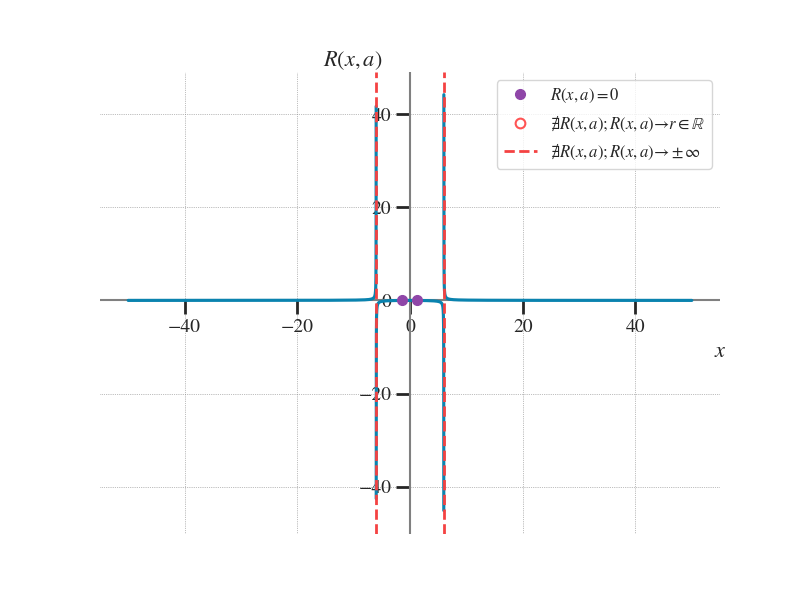

interactive(children=(IntSlider(value=1, description='$a$', max=10, min=1), Output()), _dom_classes=('widget-i…

In [88]:
rfunc_fig, rfunc_ax = set_up_plotting(8,6,r'Final R(x,a) plot')

rfunc_ax.set_xlabel('$x$',fontsize=16, x = 1)
rfunc_ax.set_ylabel('$R(x,a)$',fontsize=16, rotation = "horizontal",y=1)

rfunc_ax.grid(color='gray', linestyle=':', lw = 0.5)

rfunc_ax.axhline(y = 0,color = 'gray', label = '_nolegend_', zorder = 1)
rfunc_ax.axvline(x = 0, color = 'gray', label = '_nolegend_', zorder = 2)


def update_function_plot(a,xmin,xmax):
    
    i = len(rfunc_ax.lines)
        
    while i != 2:
        del rfunc_ax.lines[len(rfunc_ax.lines)-1]
        i = i-1

    xrange = np.linspace(xmin,xmax,100000)
    rfunc_range = R_func(xrange,a)[0]
    y = rfunc_range
    
    tol = 50
    y[y > tol] = np.nan
    y[y < -tol] = np.nan
    
    func_zeros, func_remov_disc, func_inf_disc = return_zeros(a,R_func)

    
    rfunc_ax.plot(func_zeros,np.zeros(len(func_zeros)),ls='none',marker='o',
               markersize = 7, color = '#8f46a8', label = r'$R(x,a) = 0$', zorder = 5)

    rfunc_ax.plot(func_remov_disc,np.zeros(len(func_remov_disc)),ls='none',marker='o', markeredgewidth = 1.5,
                markersize = 7, markeredgecolor = '#ff5454', color = 'white',
                label = r'$\nexists R(x,a); R(x,a) \to r \in \mathbb{R}$', zorder = 6)

    for every_inf_disc in func_inf_disc:
        rfunc_ax.axvline(x=every_inf_disc,ls='--', lw = 2,
                       markersize = 8, color = '#f44242', label = r'$\nexists R(x,a); R(x,a) \to \pm \infty$', 
                       zorder = 4, alpha = 1.0)
            

    rfunc_ax.plot(xrange,y,ls='-', color = '#0a83af', lw = 2.25, zorder = 3)
    
    rfunc_ax.relim()
    #rfunc_ax.autoscale_view()
    
    handles, labels = rfunc_ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
        
    rfunc_ax.legend(by_label.values(),by_label.keys(),loc='upper right', frameon = True, fontsize = 12)
    
    
a_slider = ipywidgets.IntSlider(min=amin,max=amax,step=1,value=1, description = '$a$')

function_interactive_plot = interactive(update_function_plot, a = a_slider, xmin=fixed(-50), xmax=fixed(50))
func_output = function_interactive_plot.children[-1]
function_interactive_plot